In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [64]:
dados = pd.read_csv('PesquisaStartup.csv')
dados

,Carimbo de data/hora,Nome de usuário,Eu sou...,Eu tenho...,Como você aprendeu a elaborar seu currículo?,Qual a sua maior dificuldade ao elaborar um currículo?,Qual ferramenta/plataforma você utiliza para montar o seu currículo ?,Quantas entrevistas de emprego você já conseguiu através do seu currículo?,Qual a sua principal dificuldade na busca por um emprego/estágio?,Quais meios você utiliza ou já utilizou para procurar e conseguir um emprego/estágio?,Você utiliza o mesmo currículo para diferentes vagas de emprego?,Na sua opinião qual a importância do currículo em um processo de seleção?,Já recebeu algum feedback sobre seu currículo?,"Se existisse um site/aplicativo que montasse seu currículo de acordo com a vaga pretendida, você usaria?",Além de um currículo personalizado você também gostaria de ficar por dentro das vagas disponíveis no mercado para sua área?,E receber indicações de cursos na sua área para melhorar o currículo?,Estaria disposto a pagar por esse serviço?
0,2020/08/25 2:07:06 PM GMT-3,matheusmartinsdutra@gmail.com,Estagiário,Entre 15 - 20 anos de idade,Mentorias e cursos online,Quando tive dificuldade estava em saber o que ...,Adobe Illustrator,7 - 8,Falta de vagas,Posts online;Redes sociais;Sites de busca;Link...,Sim,É o primeiro contato da empresa com o interessado,Sim,Sim,Sim,Sim,Não
1,2020/08/25 2:08:59 PM GMT-3,b.marques0854@gmail.com,Desempregado,Entre 21 - 30 anos de idade,Internet,Não sei ao certo como me apresentar,"Templates na internet (ex: Canva, Easel.ly)",0,Vagas,Anúncios;Posts online;Redes sociais;Indicação ...,Não,"É o resumo do contratado, é a partir dele que ...",Não,Sim,Sim,Sim,Não
2,2020/08/25 2:33:40 PM GMT-3,anabia-guimaraes@hotmail.com,Estudante (ensino superior);Estagiário,Entre 21 - 30 anos de idade,Pesquisas na internet,Fazer com que ele se destaque,"Templates na internet (ex: Canva, Easel.ly)",3 - 4,Vagas na minha área de atuação,Anúncios;Posts online;Redes sociais;Sites de b...,Não,O currículo é a primeira impressão para o poss...,Não,Sim,Sim,Sim,Sim
3,2020/08/25 2:37:49 PM GMT-3,matheusserrao60@gmail.com,Estudante (ensino superior);Estagiário,Entre 21 - 30 anos de idade,Cursinho da BETAEQ,Quais informações colocar e quais omitir,"Templates na internet (ex: Canva, Easel.ly)",1 - 2,A existência de estágios na minha área.,Anúncios;Cartazes;Posts online;Jornais;Redes s...,Não,Primeira impressão do profissional,Não,Sim,Sim,Sim,Sim
4,2020/08/25 2:41:53 PM GMT-3,mateus.fcs@hotmail.com,Desempregado,Entre 21 - 30 anos de idade,Colocando os cursos que já fiz tanto de língua...,Organizar as informações,Word,0,Achar algo que eu realmente queira trabalhar,Redes sociais;Sites de busca;Indicação de amigos,Sim,Grande importância,Não,Sim,Sim,Sim,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2020/08/26 1:31:30 PM GMT-3,raphaelmoraes019@gmail.com,Estudante (ensino superior);Empregado,Entre 21 - 30 anos de idade,Meu atual currículo é reflexo de uma palestra ...,Editar para ser interessante para cada empresa...,Word,3 - 4,Experiência,Posts online;Redes sociais;Sites de busca;Indi...,Não,destacar e selecionar os mais adequados à vaga.,Não,Sim,Sim,Não,Não
75,2020/08/26 1:54:05 PM GMT-3,kallysonlima@gmail.com,Estudante (ensino superior),Entre 15 - 20 anos de idade,Internet,organizar os tópicos,Word,1 - 2,Horário,Anúncios;Redes sociais;Indicação de amigos,Sim,"Muito importante, pois é onde eu busco passar ...",Não,Sim,Sim,Sim,Sim
76,2020/08/26 5:08:03 PM GMT-3,viniciusrpaiva1@gmail.com,Estudante (ensino superior);Estagiário;Empregado,Entre 15 - 20 anos de idade,Minha mãe me ensinou,Nenhuma,Word,1 - 2,Procurar,Indicação de amigos;Programas de estágio,Não,É muito importante,Sim,Sim,Sim,Não,Sim
77,2020/08/26 6:36:36 PM GMT-3,serenodias@gmail.com,Estudante (ensino superior),Entre 15 - 20 anos de idade,modelos na internet,competências,"Templates na internet (ex: Canva, Easel.ly)",5 - 6,vagas disponíveis,Redes sociais;Sites de busca;Indicação de amigos,Sim,qualificação,Sim,Sim,Si

In [65]:
dados.columns = ['data','nome','cargo','idade','elaborarCurriculo','dificuldadeCurriculo','ferramenta','entrevistas','dificuldadeEmprego','meiosProcura','curriculoIgual','importancia','feedback','appSite','cvPersonalizado','vagasOpen','pagamento']
dados

,data,nome,cargo,idade,elaborarCurriculo,dificuldadeCurriculo,ferramenta,entrevistas,dificuldadeEmprego,meiosProcura,curriculoIgual,importancia,feedback,appSite,cvPersonalizado,vagasOpen,pagamento
0,2020/08/25 2:07:06 PM GMT-3,matheusmartinsdutra@gmail.com,Estagiário,Entre 15 - 20 anos de idade,Mentorias e cursos online,Quando tive dificuldade estava em saber o que ...,Adobe Illustrator,7 - 8,Falta de vagas,Posts online;Redes sociais;Sites de busca;Link...,Sim,É o primeiro contato da empresa com o interessado,Sim,Sim,Sim,Sim,Não
1,2020/08/25 2:08:59 PM GMT-3,b.marques0854@gmail.com,Desempregado,Entre 21 - 30 anos de idade,Internet,Não sei ao certo como me apresentar,"Templates na internet (ex: Canva, Easel.ly)",0,Vagas,Anúncios;Posts online;Redes sociais;Indicação ...,Não,"É o resumo do contratado, é a partir dele que ...",Não,Sim,Sim,Sim,Não
2,2020/08/25 2:33:40 PM GMT-3,anabia-guimaraes@hotmail.com,Estudante (ensino superior);Estagiário,Entre 21 - 30 anos de idade,Pesquisas na internet,Fazer com que ele se destaque,"Templates na internet (ex: Canva, Easel.ly)",3 - 4,Vagas na minha área de atuação,Anúncios;Posts online;Redes sociais;Sites de b...,Não,O currículo é a primeira impressão para o poss...,Não,Sim,Sim,Sim,Sim
3,2020/08/25 2:37:49 PM GMT-3,matheusserrao60@gmail.com,Estudante (ensino superior);Estagiário,Entre 21 - 30 anos de idade,Cursinho da BETAEQ,Quais informações colocar e quais omitir,"Templates na internet (ex: Canva, Easel.ly)",1 - 2,A existência de estágios na minha área.,Anúncios;Cartazes;Posts online;Jornais;Redes s...,Não,Primeira impressão do profissional,Não,Sim,Sim,Sim,Sim
4,2020/08/25 2:41:53 PM GMT-3,mateus.fcs@hotmail.com,Desempregado,Entre 21 - 30 anos de idade,Colocando os cursos que já fiz tanto de língua...,Organizar as informações,Word,0,Achar algo que eu realmente queira trabalhar,Redes sociais;Sites de busca;Indicação de amigos,Sim,Grande importância,Não,Sim,Sim,Sim,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2020/08/26 1:31:30 PM GMT-3,raphaelmoraes019@gmail.com,Estudante (ensino superior);Empregado,Entre 21 - 30 anos de idade,Meu atual currículo é reflexo de uma palestra ...,Editar para ser interessante para cada empresa...,Word,3 - 4,Experiência,Posts online;Redes sociais;Sites de busca;Indi...,Não,destacar e selecionar os mais adequados à vaga.,Não,Sim,Sim,Não,Não
75,2020/08/26 1:54:05 PM GMT-3,kallysonlima@gmail.com,Estudante (ensino superior),Entre 15 - 20 anos de idade,Internet,organizar os tópicos,Word,1 - 2,Horário,Anúncios;Redes sociais;Indicação de amigos,Sim,"Muito importante, pois é onde eu busco passar ...",Não,Sim,Sim,Sim,Sim
76,2020/08/26 5:08:03 PM GMT-3,viniciusrpaiva1@gmail.com,Estudante (ensino superior);Estagiário;Empregado,Entre 15 - 20 anos de idade,Minha mãe me ensinou,Nenhuma,Word,1 - 2,Procurar,Indicação de amigos;Programas de estágio,Não,É muito importante,Sim,Sim,Sim,Não,Sim
77,2020/08/26 6:36:36 PM GMT-3,serenodias@gmail.com,Estudante (ensino superior),Entre 15 - 20 anos de idade,modelos na internet,competências,"Templates na internet (ex: Canva, Easel.ly)",5 - 6,vagas disponíveis,Redes sociais;Sites de busca;Indicação de amigos,Sim,qualificação,Sim,Sim,Sim,Sim,Sim


In [66]:
def procurarPalavra(coluna,palavra):
  contador = 0
  for s in dados[coluna]:
    if palavra in s:
      contador = contador + 1
  return contador


In [67]:
dadosInternet = (procurarPalavra('elaborarCurriculo','internet') + procurarPalavra('elaborarCurriculo','Internet'))
print(dadosInternet)

32


In [68]:
solitario = procurarPalavra('elaborarCurriculo','soz') + procurarPalavra('elaborarCurriculo','Soz')
solitario

5

In [69]:
pesquisaNum = procurarPalavra('elaborarCurriculo','pes') + procurarPalavra('elaborarCurriculo','Pes')
pesquisaNum

12

In [70]:
cursosFeitos =procurarPalavra('elaborarCurriculo','cur') + procurarPalavra('elaborarCurriculo','Cur')
cursosFeitos

17

In [71]:
modelos = procurarPalavra('elaborarCurriculo','mod')+1 + procurarPalavra('elaborarCurriculo','Mod') + (procurarPalavra('elaborarCurriculo','tem')-1) + procurarPalavra('elaborarCurriculo','fam')
modelos

13

In [72]:
dadosGraf = {'tipo':['Internet','Sozinho','Pesquisando','Cursos','Modelos'],'Qtd':[dadosInternet,solitario,pesquisaNum, cursosFeitos,modelos]}
graf = pd.DataFrame(data=dadosGraf)
ordenado = graf.sort_values(by='Qtd')
ordenado

,tipo,Qtd
1,Sozinho,5
2,Pesquisando,12
4,Modelos,13
3,Cursos,17
0,Internet,32


In [73]:
ordenado['Qtd'].sum()

79

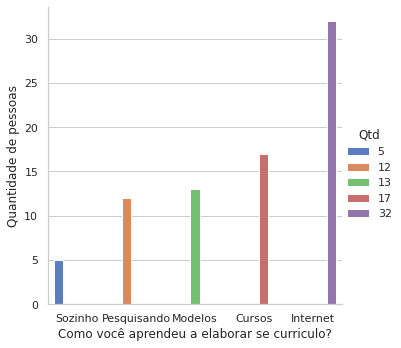

In [74]:
sns.set(style="whitegrid")
g = sns.catplot(x="tipo", y="Qtd", hue='Qtd', data=ordenado, kind="bar", palette="muted")
g.set_ylabels("Quantidade de pessoas")
g.set_xlabels("Como você aprendeu a elaborar se curriculo?")
g.savefig('Como_você_aprendeu_a_elaborar_se_curriculo.png')

In [75]:
dados['dificuldadeCurriculo']

0     Quando tive dificuldade estava em saber o que ...
1                  Não sei ao certo como me apresentar 
2                         Fazer com que ele se destaque
3              Quais informações colocar e quais omitir
4                             Organizar as informações 
                            ...                        
74    Editar para ser interessante para cada empresa...
75                               organizar os tópicos  
76                                              Nenhuma
77                                        competências 
78    Saber priorizar o que é importante para aquela...
Name: dificuldadeCurriculo, Length: 79, dtype: object

In [76]:
nenhuma = procurarPalavra('dificuldadeCurriculo','Nenhu')
nenhuma

5

In [77]:
outros = 23
outros

23

In [78]:
informacao = procurarPalavra('dificuldadeCurriculo','Org')+procurarPalavra('dificuldadeCurriculo','org')+procurarPalavra('dificuldadeCurriculo','cer')+procurarPalavra('dificuldadeCurriculo','Cer')+procurarPalavra('dificuldadeCurriculo','Cur')+procurarPalavra('dificuldadeCurriculo','cur')+procurarPalavra('dificuldadeCurriculo','Exp')+procurarPalavra('dificuldadeCurriculo','exp')+procurarPalavra('dificuldadeCurriculo','tu')+procurarPalavra('dificuldadeCurriculo','Tu')+procurarPalavra('dificuldadeCurriculo','Inf')+procurarPalavra('dificuldadeCurriculo','inf') +procurarPalavra('dificuldadeCurriculo','Obj')+procurarPalavra('dificuldadeCurriculo','obj')
informacao

51

In [99]:
dificuldadeCurriculo = {'titulo':['Nenhuma','Outras','Informações'],'Quantidade':[nenhuma,outros,informacao]}
dificuldadeCurriculoDF = pd.DataFrame(data=dificuldadeCurriculo)
dificuldadeCurriculoDF.sort_values(by='Quantidade')

,titulo,Quantidade
0,Nenhuma,5
1,Outras,23
2,Informações,51


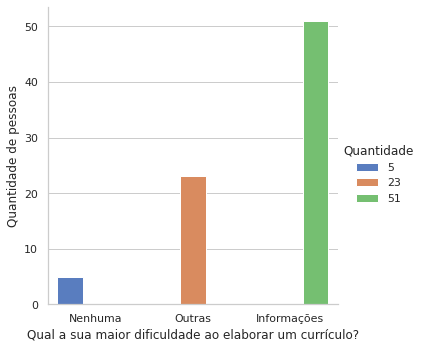

In [100]:
dificuldade= sns.catplot(x="titulo", y="Quantidade", hue='Quantidade', data=dificuldadeCurriculoDF.sort_values(by='Quantidade'), kind="bar", palette="muted")
dificuldade.set_ylabels("Quantidade de pessoas")
dificuldade.set_xlabels("Qual a sua maior dificuldade ao elaborar um currículo?")
dificuldade.savefig('Qual_a_sua_maior_dificuldade_ao_elaborar_um_currículo?.png')

In [81]:
#qual a sua maior dificuldade ao elaborar um currículo
procurarPalavra('dificuldadeEmprego','vag')

18

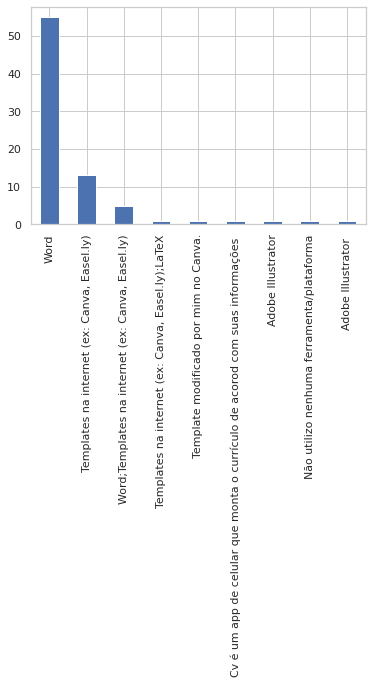

In [82]:
dados['ferramenta'].value_counts().plot.bar();

In [83]:
dados['dificuldadeEmprego']

0                                   Falta de vagas 
1                                            Vagas 
2                   Vagas na minha área de atuação 
3           A existência de estágios na minha área.
4     Achar algo que eu realmente queira trabalhar 
                          ...                      
74                                      Experiência
75                                          Horário
76                                         Procurar
77                               vagas disponíveis 
78                           Até o momento nenhuma 
Name: dificuldadeEmprego, Length: 79, dtype: object

In [84]:
vagas = procurarPalavra('dificuldadeEmprego','vag') + procurarPalavra('dificuldadeEmprego','Vag')
vagas

21

In [85]:
experiencia = procurarPalavra('dificuldadeEmprego','exp') + procurarPalavra('dificuldadeEmprego','Exp')
experiencia

18

In [86]:
nao = procurarPalavra('dificuldadeEmprego','não') + procurarPalavra('dificuldadeEmprego','Não')
nao

10

In [87]:
qual = procurarPalavra('dificuldadeEmprego','Qua') + procurarPalavra('dificuldadeEmprego','qua')
qual

7

In [88]:
dificuldadeEmprego = {'titulo':['Vagas','Experiência','Não Sabem','Outros'],'Quantidade':[vagas,(experiencia+qual),nao,23]}
dificuldadeEmpregoDF = pd.DataFrame(data=dificuldadeEmprego)
dificuldadeEmpregoDF.sort_values(by='Quantidade')

,titulo,Quantidade
2,Não Sabem,10
0,Vagas,21
3,Outros,23
1,Experiência,25


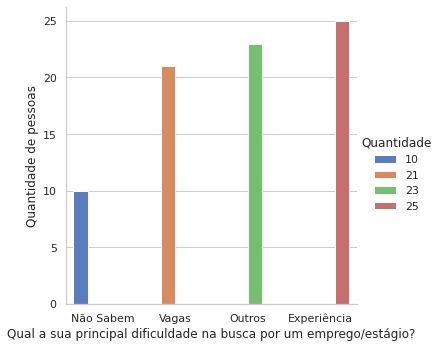

In [89]:
dificuldade= sns.catplot(x="titulo", y="Quantidade", hue='Quantidade', data=dificuldadeEmpregoDF.sort_values(by='Quantidade'), kind="bar", palette="muted")
dificuldade.set_ylabels("Quantidade de pessoas")
dificuldade.set_xlabels("Qual a sua principal dificuldade na busca por um emprego/estágio?")
dificuldade.savefig('Qual_a_sua_principal_dificuldade_na_busca_por_um_emprego_estagio?.png')

In [90]:
#Na sua opinião qual a importância do currículo em um processo de seleção?
dados['importancia']

0     É o primeiro contato da empresa com o interessado
1     É o resumo do contratado, é a partir dele que ...
2     O currículo é a primeira impressão para o poss...
3                    Primeira impressão do profissional
4                                   Grande importância 
                            ...                        
74      destacar e selecionar os mais adequados à vaga.
75    Muito importante, pois é onde eu busco passar ...
76                                   É muito importante
77                                        qualificação 
78    Ele funciona como um filtro de candidatos, sen...
Name: importancia, Length: 79, dtype: object

In [91]:
impressao = procurarPalavra('importancia','impressão') + procurarPalavra('importancia','Impressão')
impressao

6

In [92]:
importante = procurarPalavra('importancia','importância') + procurarPalavra('importancia','Importância') + procurarPalavra('importancia','importante') + procurarPalavra('importancia','Importante') +procurarPalavra('importancia','extrema') + procurarPalavra('importancia','Extrema')
importante

20

In [93]:
muito = procurarPalavra('importancia','Muito') + procurarPalavra('importancia','muito')+  procurarPalavra('importancia','Essencial') + procurarPalavra('importancia','imprescindível')
muito

15

In [94]:
apresentacao =procurarPalavra('importancia','Apre')+6 + procurarPalavra('importancia','apre') + procurarPalavra('importancia','info')
apresentacao

16

In [95]:
primeira =procurarPalavra('importancia','Prime') +6+ procurarPalavra('importancia','primeir') + procurarPalavra('importancia','competências')
primeira

24

In [96]:
importancia = {'titulo':['Primeira Impressão','Importante','Apresentação'],'Quantidade':[(primeira+impressao),(importante+muito),apresentacao]}
importanciaDF = pd.DataFrame(data=importancia)
importanciaDF.sort_values(by='Quantidade')

,titulo,Quantidade
2,Apresentação,16
0,Primeira Impressão,30
1,Importante,35


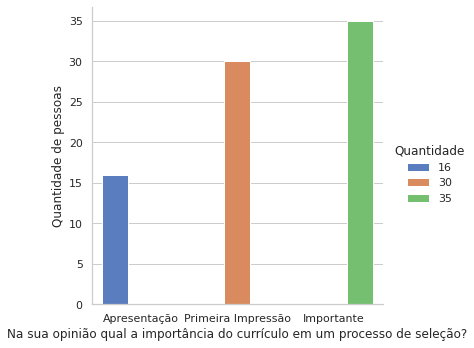

In [97]:
imp= sns.catplot(x="titulo", y="Quantidade", hue='Quantidade', data=importanciaDF.sort_values(by='Quantidade'), kind="bar", palette="muted")
imp.set_ylabels("Quantidade de pessoas")
imp.set_xlabels("Na sua opinião qual a importância do currículo em um processo de seleção?")
imp.savefig('Na_sua_opinião_qual_a_importância_do_currículo_em_um_processo_de_seleção?.png')